In [178]:
import pandas as pd
import numpy as np
import random

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [182]:
combine = [train_df, test_df]

In [183]:
print('ratio of missing Cabin in Training: ', train_df['Cabin'].isna().sum() / len(train_df))
print('ratio of missing Age in Training: ', train_df['Age'].isna().sum() / len(train_df))
print('ratio of missing Embarked in Training: ', train_df['Embarked'].isna().sum() / len(train_df))
print('---')
print('ratio of missing Cabin in Test: ', test_df['Cabin'].isna().sum() / len(test_df))
print('ratio of missing Age in Test: ', test_df['Age'].isna().sum() / len(test_df))
print('ratio of missing Embarked in Test: ', test_df['Embarked'].isna().sum() / len(test_df))

ratio of missing Cabin in Training:  0.7710437710437711
ratio of missing Age in Training:  0.19865319865319866
ratio of missing Embarked in Training:  0.002244668911335578
---
ratio of missing Cabin in Test:  0.7822966507177034
ratio of missing Age in Test:  0.20574162679425836
ratio of missing Embarked in Test:  0.0


In [184]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [187]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(['Survived'], ascending=False)
# higher class has more chance of survival 

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [188]:
train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(['Survived'], ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [189]:
train_df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(['Survived'], ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


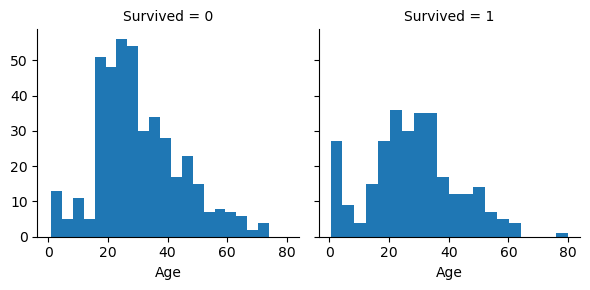

In [190]:
grid1 = sns.FacetGrid(train_df, col='Survived')
grid1.map(plt.hist, 'Age', bins=20)

/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


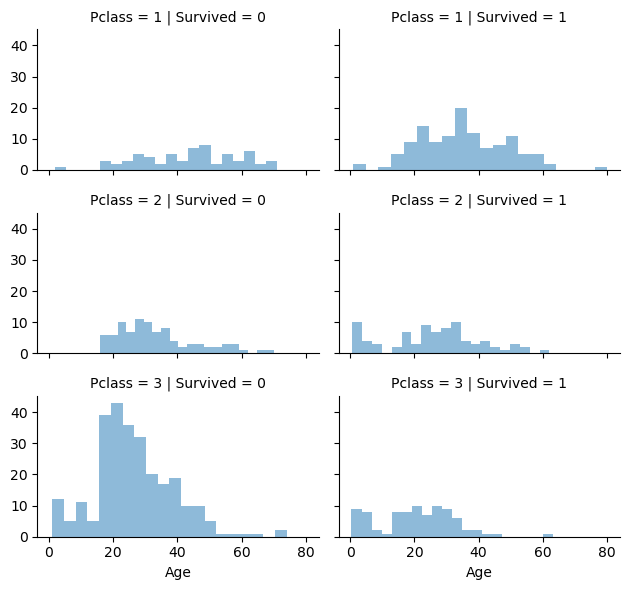

In [191]:
grid2 = sns.FacetGrid(train_df, col='Survived', row="Pclass", height=2, aspect=1.6)
grid2.map(plt.hist, 'Age', alpha=0.5, bins=20)

/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


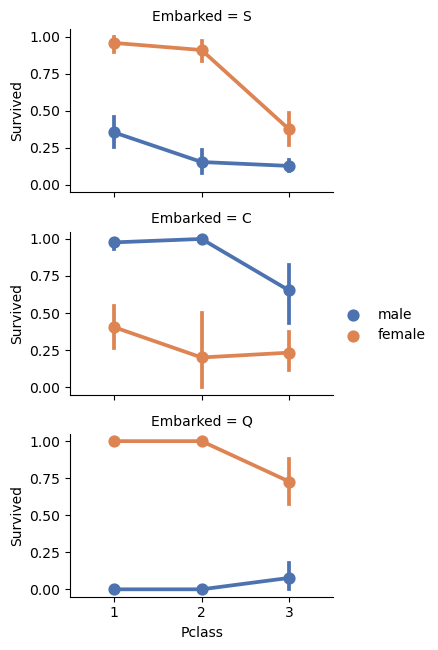

In [192]:
grid3 = sns.FacetGrid(train_df, row="Embarked", height=2.2, aspect=1.6)
grid3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid3.add_legend()
# when Embarked == c, males have more chance of survival, could be due to correlation between pclass and embarked

/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


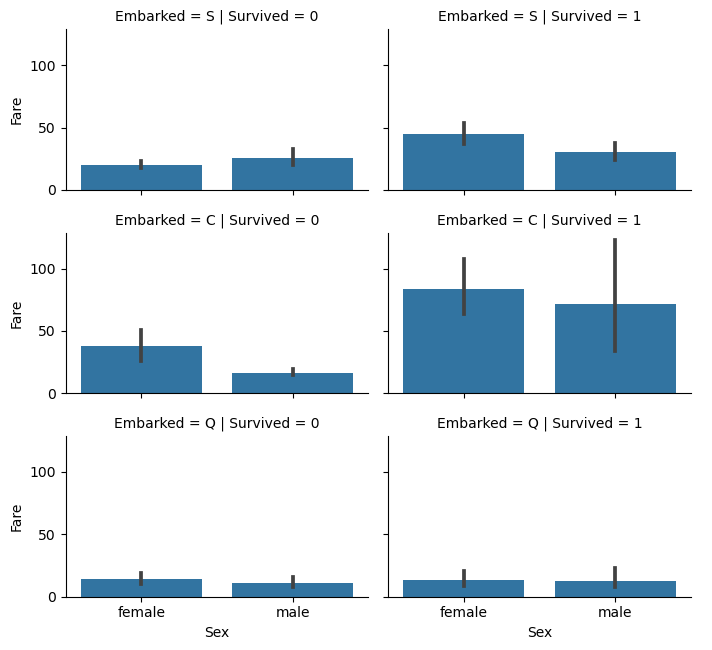

In [193]:
grid4 = sns.FacetGrid(train_df, row="Embarked", col='Survived', height=2.2, aspect=1.6)
grid4.map(sns.barplot, 'Sex', 'Fare')
grid4.add_legend()
# higher fare paid implies more chance of survival

In [194]:
print('before dropping features', train_df.shape, test_df.shape, )

# Ticket as hgih ratio of duplicates, lack of correlation with survival
# Cabin has too many missing values
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1) 
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1) 
combine = [train_df, test_df]

print('after dropping features', train_df.shape, test_df.shape, )

before dropping features (891, 12) (418, 11)
after dropping features (891, 10) (418, 9)


In [195]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [196]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace([
        'Lady',
        'Countess',
        'Capt',
        'Col',
        'Don',
        'Dr',
        'Major',
        'Rev',
        'Sir',
        'Jonkheer',
        'Dona'
    ], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [197]:
title_mapping = {'Mr': 1, 'Miss': 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [198]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [199]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/Users/yukizhang/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


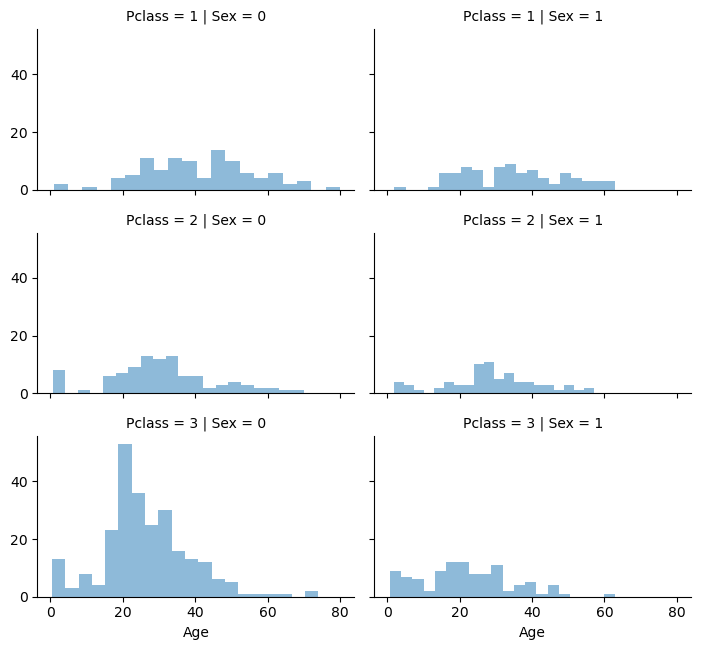

In [200]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

In [201]:
for dataset in combine:
    print('---')
    missing_age_index = dataset[dataset['Age'].isnull()].index
    print(dataset.loc[missing_age_index])
    df = dataset.groupby(['Pclass', 'Sex'])['Age'].median()
    guess_age = np.reshape(df.to_numpy(), (2, 3), order="F")
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset['Pclass'] == j + 1) & (dataset['Sex'] == i) & (dataset['Age'].isnull()), 'Age'] = guess_age[i][j]
    dataset['Age'] = dataset['Age'].astype(int)
    print(dataset.loc[missing_age_index])


---
     Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
5           0       3    0  NaN      0      0   8.4583        Q      1
17          1       2    0  NaN      0      0  13.0000        S      1
19          1       3    1  NaN      0      0   7.2250        C      3
26          0       3    0  NaN      0      0   7.2250        C      1
28          1       3    1  NaN      0      0   7.8792        Q      2
..        ...     ...  ...  ...    ...    ...      ...      ...    ...
859         0       3    0  NaN      0      0   7.2292        C      1
863         0       3    1  NaN      8      2  69.5500        S      2
868         0       3    0  NaN      0      0   9.5000        S      1
878         0       3    0  NaN      0      0   7.8958        S      1
888         0       3    1  NaN      1      2  23.4500        S      2

[177 rows x 9 columns]
     Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
5           0       3    0   25      0      0   8

In [202]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df.groupby(['AgeBand'])['Survived'].mean().reset_index().sort_values(['AgeBand'])

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [203]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [204]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]

In [205]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


In [206]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df.groupby(['FamilySize']).agg({'Survived': ['mean', 'sum', 'size']})


Survived          
                mean  sum size
FamilySize                    
1           0.303538  163  537
2           0.552795   89  161
3           0.578431   59  102
4           0.724138   21   29
5           0.200000    3   15
6           0.136364    3   22
7           0.333333    4   12
8           0.000000    0    6
11          0.000000    0    7

In [207]:
for dataset in combine:
    dataset = dataset.drop(['SibSp', 'Parch'], inplace=True, axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,S,1,2
1,1,1,1,2,71.2833,C,3,2
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,2
4,0,3,0,2,8.0500,S,1,1


In [208]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [209]:
most_freq_port = train_df['Embarked'].mode().loc[0]
missing_port_index = train_df['Embarked'].isnull()
train_df.loc[missing_port_index, 'Embarked'] = most_freq_port
train_df.loc[missing_port_index, 'Embarked']

61     S
829    S
Name: Embarked, dtype: object

In [210]:
train_df.groupby('Embarked')['Survived'].mean().reset_index().sort_values('Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [211]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(({'S': 0, 'C': 1, 'Q': 2}))
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Age*Class
0,0,3,0,1,7.2500,0,1,2,3
1,1,1,1,2,71.2833,1,3,2,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,2,2
4,0,3,0,2,8.0500,0,1,1,6


In [215]:
for dataset in combine:
    missing_fare_index = dataset['Fare'].isnull()
    print(dataset.loc[missing_fare_index, 'Fare'])
    most_freq_fare = dataset['Fare'].mode().loc[0]
    print(most_freq_fare)
    dataset.loc[missing_fare_index, 'Fare'] = most_freq_fare
    print(dataset.loc[missing_fare_index, 'Fare'])
    

Series([], Name: Fare, dtype: float64)
8.05
Series([], Name: Fare, dtype: float64)
152   NaN
Name: Fare, dtype: float64
7.75
152    7.75
Name: Fare, dtype: float64
